In [209]:
from matplotlib import pyplot as plt
from math import sqrt, pow, atan2, pi, fabs, ceil, cos, sin, floor

PI=3.141592653589793
MAX_LINE_LEN=2
MIN_ANGLE=3*pi/180
EPSILON=0.001

def fequal(f1, f2):
    d = f2-f1
    return (d >= -EPSILON and d <= EPSILON)

def fge(f1, f2):
    return (f1-f2 >= -EPSILON)

def sdeg(rad):
    return rad*360/2/PI

def deg(rad):
    if rad < 0:
        return rad*360/2/PI+360
    return rad*360/2/PI

def pos_angle_rec(rad):
    if feg(rad, 2*PI):
        return pos_angle(rad - 2*PI)
    if rad < 0:
        return pos_angle(rad + 2*PI)
    return rad


def pos_angle(rad):
    if fge(rad, 2*PI):
        if rad < 4*PI:
            return (rad - 2*PI)
        else:
            return rad - floor(rad / 2*PI) * 2*PI
    
    if rad < 0:
        if  rad >= -2*PI:
            return (rad + 2*PI);
        else:
            return rad - ceil(rad / 2*PI) * 2*PI
        
    return rad;


def ctop(x0, y0, x1, y1, i, j, clockwise):
    cx = x0+i
    cy = y0+j
    print("cx %.3f cy %.3f" % (cx, cy))
    r = sqrt(pow(x0-cx,2)+pow(y0-cy,2))
    sa0 = atan2((y0-cy),(x0-cx))
    sa1 = atan2((y1-cy),(x1-cx))
    a0 = pos_angle(sa0)
    a1 = pos_angle(sa1)
    da = pos_angle(a0-a1) if clockwise else pos_angle(a1-a0)
    print("r %.3f a0 %.1f a1 %.1f da %.1f" % (r, deg(a0), deg(a1), deg(da)))
    
    arclen = fabs(r * da)
    print("arc len %.3f" % arclen)
    
    numseg = int(min(ceil(arclen / MAX_LINE_LEN), ceil(da / MIN_ANGLE)))
    print("numseg %d" % numseg)
    
    a_inc = -da / numseg if clockwise else da / numseg
    print("a_inc %5.1f" % sdeg(a_inc))
    
    a = a0
    print("a %5.1f" % deg(a))
    px = x0
    py = y0
    ax=[px]
    ay=[py]
    while(not fequal(a, a1) and len(ax) < 50):
        a = pos_angle(a + a_inc)
        x = cos(a) * r + cx
        y = sin(a) * r + cy
        #print("a %5.1f %.4f sin %.3f cos %.3f" % (deg(a), a, sin(a), cos(a)))
        print("a %5.1f %.4f - (%6.1f, %6.1f)-(%6.1f, %6.1f)" % (deg(a),a,px,py,x,y))
        ax.append(x)
        ay.append(y)
        px = x
        py = y
    #print("-----------")
    
    return (ax, ay)

cx 28.017 cy 280.048
r 228.958 a0 276.7 a1 274.7 da 2.0
arc len 7.934
numseg 1
a_inc  -2.0
a 276.7
a 274.7 4.7950 - (  54.8,   52.7)-(  46.9,   51.9)


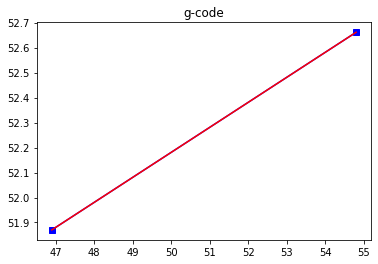

In [203]:
(ax, ay) = ctop(54.795951,52.661530,46.901544,51.870239,-26.778791,227.386398,True)
plt.plot(ax, ay, 'bs', ax, ay, 'b-', [ax[0], ax[-1]], [ay[0], ay[-1]], 'r-')
plt.title("g-code")
plt.show()

cx 100.000 cy 100.000
r 10.000 a0 90.0 a1 0.0 da 90.0
arc len 15.708
numseg 8
a_inc -11.2
a  90.0
a  78.8 1.3744 - ( 100.0,  110.0)-( 102.0,  109.8)
a  67.5 1.1781 - ( 102.0,  109.8)-( 103.8,  109.2)
a  56.2 0.9817 - ( 103.8,  109.2)-( 105.6,  108.3)
a  45.0 0.7854 - ( 105.6,  108.3)-( 107.1,  107.1)
a  33.8 0.5890 - ( 107.1,  107.1)-( 108.3,  105.6)
a  22.5 0.3927 - ( 108.3,  105.6)-( 109.2,  103.8)
a  11.2 0.1963 - ( 109.2,  103.8)-( 109.8,  102.0)
a   0.0 0.0000 - ( 109.8,  102.0)-( 110.0,  100.0)


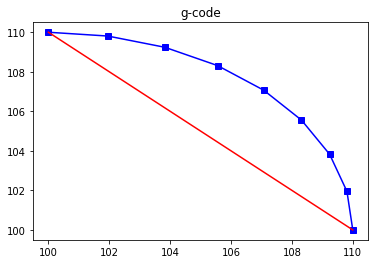

In [204]:
(ax, ay) = ctop(100,110,110,100,0,-10,True)
plt.plot(ax, ay, 'bs', ax, ay, 'b-', [ax[0], ax[-1]], [ay[0], ay[-1]], 'r-')
plt.title("g-code")
plt.show()

cx 100.000 cy 100.000
r 10.000 a0 0.0 a1 90.0 da 270.0
arc len 47.124
numseg 24
a_inc -11.2
a   0.0
a 348.8 6.0868 - ( 110.0,  100.0)-( 109.8,   98.0)
a 337.5 5.8905 - ( 109.8,   98.0)-( 109.2,   96.2)
a 326.2 5.6941 - ( 109.2,   96.2)-( 108.3,   94.4)
a 315.0 5.4978 - ( 108.3,   94.4)-( 107.1,   92.9)
a 303.7 5.3014 - ( 107.1,   92.9)-( 105.6,   91.7)
a 292.5 5.1051 - ( 105.6,   91.7)-( 103.8,   90.8)
a 281.2 4.9087 - ( 103.8,   90.8)-( 102.0,   90.2)
a 270.0 4.7124 - ( 102.0,   90.2)-( 100.0,   90.0)
a 258.7 4.5160 - ( 100.0,   90.0)-(  98.0,   90.2)
a 247.5 4.3197 - (  98.0,   90.2)-(  96.2,   90.8)
a 236.2 4.1233 - (  96.2,   90.8)-(  94.4,   91.7)
a 225.0 3.9270 - (  94.4,   91.7)-(  92.9,   92.9)
a 213.7 3.7306 - (  92.9,   92.9)-(  91.7,   94.4)
a 202.5 3.5343 - (  91.7,   94.4)-(  90.8,   96.2)
a 191.2 3.3379 - (  90.8,   96.2)-(  90.2,   98.0)
a 180.0 3.1416 - (  90.2,   98.0)-(  90.0,  100.0)
a 168.7 2.9452 - (  90.0,  100.0)-(  90.2,  102.0)
a 157.5 2.7489 - (  90.2,  102.0)

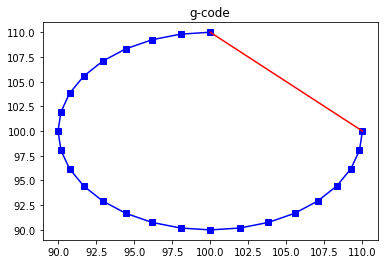

In [205]:
(ax, ay) = ctop(110,100,100,110,-10,0,True)
plt.plot(ax, ay, 'bs', ax, ay, 'b-', [ax[0], ax[-1]], [ay[0], ay[-1]], 'r-')
plt.title("g-code")
plt.show()

cx 49.120 cy 115.824
r 5.337 a0 0.0 a1 46.8 da 46.8
arc len 4.356
numseg 3
a_inc  15.6
a   0.0
a  15.6 0.2721 - (  54.5,  115.8)-(  54.3,  117.3)
a  31.2 0.5442 - (  54.3,  117.3)-(  53.7,  118.6)
a  46.8 0.8163 - (  53.7,  118.6)-(  52.8,  119.7)


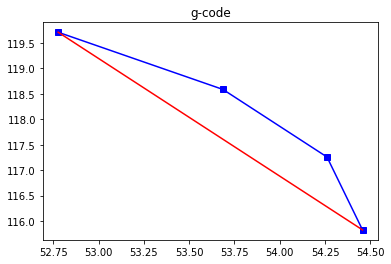

In [206]:
(ax, ay) = ctop(54.457324, 115.823881, 52.775852, 119.712385, -5.336934, 0.000000, False)
plt.plot(ax, ay, 'bs', ax, ay, 'b-', [ax[0], ax[-1]], [ay[0], ay[-1]], 'r-')
plt.title("g-code")
plt.show()

cx 111.101 cy 100.955
r 6.081 a0 311.8 a1 0.0 da 48.2
arc len 5.116
numseg 3
a_inc  16.1
a 311.8
a 327.9 5.7224 - ( 115.2,   96.4)-( 116.3,   97.7)
a 343.9 6.0028 - ( 116.3,   97.7)-( 116.9,   99.3)
a   0.0 0.0000 - ( 116.9,   99.3)-( 117.2,  101.0)


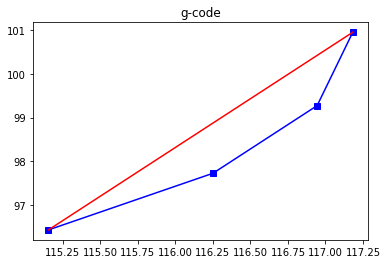

In [207]:
#G03 X115.154291 Y96.421929 Z-0.125000 I0.000000 J10.217124
#G03 X117.181999 Y100.955236 Z-0.125000 I-4.053660 J4.533307
(ax, ay) = ctop(115.154291, 96.421929, 117.181999, 100.955236, -4.053660, 4.533307, False)
plt.plot(ax, ay, 'bs', ax, ay, 'b-', [ax[0], ax[-1]], [ay[0], ay[-1]], 'r-')
plt.title("g-code")
plt.show()

cx 133.009 cy 127.031
r 3.346 a0 315.1 a1 0.0 da 44.9
arc len 2.624
numseg 2
a_inc  22.5
a 315.1
a 337.5 5.8911 - ( 135.4,  124.7)-( 136.1,  125.8)
a   0.0 0.0000 - ( 136.1,  125.8)-( 136.4,  127.0)


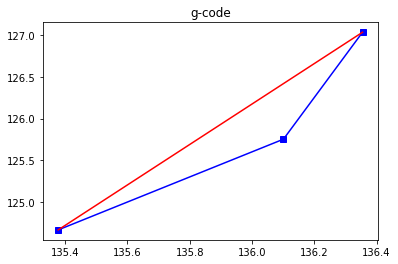

In [210]:
#G03 X135.377842 Y124.668164 Z-0.125000 I0.000000 J3.326443
#G03 X136.354977 Y127.031412 Z-0.125000 I-2.369245 J2.363248
(ax, ay) = ctop(135.377842, 124.668164, 136.354977, 127.031412, -2.369245, 2.363248, False)
plt.plot(ax, ay, 'bs', ax, ay, 'b-', [ax[0], ax[-1]], [ay[0], ay[-1]], 'r-')
plt.title("g-code")
plt.show()